In [437]:
import requests
import re
import json
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

**Obtain the 200 top-ranking** universities in www.topuniversities.com (ranking 2018). In particular, extract the following fields for each university: **name**, **rank**, **country** and **region**, **number of faculty members** (international and total) and **number of students** (international and total). Some information is not available in the main list and you have to find them in the details page. **Store the resulting dataset in a pandas DataFrame** and answer the following questions:


First step is to get the url for json data from Chrome Inspector Tool or Postman:
Using Postman, we define the URL `URL_topu_ranking` where we can get the World University Ranking 2018. It is a text file where the informations are stored as JSON.  
We get this JSON object by doing a request (using the `requests` library). All the informations are in the first attribute `data`, that we extract.

In [438]:
# JSON of topuniversities ranking
#Using Postman, we know the URL of the information we are looking for: ranking of the universities
URL = 'https://www.topuniversities.com/sites/default/files/qs-rankings-data/357051.txt'

Secondly, we set up a request to get content of the webpage about top unviersities rankings:

In [439]:
r = requests.get(URL)

Then we need to convert json data to dict :

In [440]:
data = r.json()

We need to transform this JSON into a data frame. So we convert to df from dict and select only the top 200 rows:

In [441]:
# All the informations are contains into the associted value of the data key
df = pd.DataFrame.from_dict(data.get('data'))
df = df.iloc[0:200]
df.head()

,cc,core_id,country,guide,logo,nid,rank_display,region,score,stars,title,url
0,US,410,United States,"<a href=""/where-to-study/north-america/united-...","<img src=""https://www.topuniversities.com/site...",294850,1,North America,100,6,Massachusetts Institute of Technology (MIT),/universities/massachusetts-institute-technolo...
1,US,573,United States,"<a href=""/where-to-study/north-america/united-...","<img src=""https://www.topuniversities.com/site...",297282,2,North America,98.7,5,Stanford University,/universities/stanford-university
2,US,253,United States,"<a href=""/where-to-study/north-america/united-...","<img src=""https://www.topuniversities.com/site...",294270,3,North America,98.4,5,Harvard University,/universities/harvard-university
3,US,94,United States,"<a href=""/where-to-study/north-america/united-...","<img src=""https://www.topuniversities.com/site...",294562,4,North America,97.7,5,California Institute of Technology (Caltech),/universities/california-institute-technology-...
4,GB,95,United Kingdom,"<a href=""/where-to-study/europe/united-kingdom...","<img src=""https://www.topuniversities.com/site...",294561,5,Europe,95.6,5,University of Cambridge,/universities/university-cambridge


The dataframe above eventually displays the top ranked 200 universities from QS rankings.

We create a dataframe `df` which will contain the universities and the interesting fields : **name**, **rank**, **country** and **region**, **number of faculty members** (international and total) and **number of students** (international and total)

Note that we treat only the 200 first items of our dataframe containing the complete ranking, as we are interested only in the 200 top-ranking. 


Few informations are accessible directly at the `URL_topu_ranking`, so in our `data_topu` object. Others informations, such as the number of students of faculty is not available there. Thu, we have to access the page from each specific university toget those informations. 
To do so, we make a new request to the detail page of the specific university, which return an HTML page that we parse using `BeautifulSoup`. 
By looking at the HTML file separatly, we found in which component the informations we looked for are stored in. According to the type of tag (`div`) and the specific class(e.g. `total student`), we can get the value as a string and then convert it.

If the component does not exist, we save the value as `Nan`.

In [442]:
nb_faculty=[]
nb_faculty_inter=[]
nb_students=[]
nb_students_inter=[]

for url in df['url']:
    p = requests.get('https://www.topuniversities.com'+url).text
    s = BeautifulSoup(p, 'html.parser')
    
    if(s.find("div", {"class": "total faculty"})!=None):
        nb_faculty.append(s.find("div", {"class": "total faculty"}).find("div",{"class": "number"}).text.strip().replace(',',''))
    else:
        nb_faculty.append(np.nan)
    if(s.find("div", {"class": "inter faculty"})!=None):
        nb_faculty_inter.append(s.find("div", {"class": "inter faculty"}).find("div",{"class": "number"}).string.strip().replace(',',''))
    else:
        nb_faculty_inter.append(np.nan)    
    if(s.find("div", {"class": "total student"})!=None):
        nb_students.append(s.find("div", {"class": "total student"}).find("div",{"class": "number"}).text.strip().replace(',',''))
    else:
        nb_students.append(np.nan)
    if(s.find("div", {"class": "total inter"})!=None):
        nb_students_inter.append(s.find("div", {"class": "total inter"}).find("div",{"class": "number"}).string.strip().replace(',',''))
    else:
        nb_students_inter.append(np.nan)

Add new columns to dataframe with lists created in the previous step in order to correlate these new info to the universities they belong to:

In [443]:
df['Nb Faculty QS']=nb_faculty
df['Nb Faculty inter QS']=nb_faculty_inter
df['Nb Students QS']=nb_students
df['Nb Students Inter QS']=nb_students_inter

In [444]:
df.head()

,cc,core_id,country,guide,logo,nid,rank_display,region,score,stars,title,url,Nb Faculty QS,Nb Faculty inter QS,Nb Students QS,Nb Students Inter QS
0,US,410,United States,"<a href=""/where-to-study/north-america/united-...","<img src=""https://www.topuniversities.com/site...",294850,1,North America,100,6,Massachusetts Institute of Technology (MIT),/universities/massachusetts-institute-technolo...,2982,1679,11067,3717
1,US,573,United States,"<a href=""/where-to-study/north-america/united-...","<img src=""https://www.topuniversities.com/site...",297282,2,North America,98.7,5,Stanford University,/universities/stanford-university,4285,2042,15878,3611
2,US,253,United States,"<a href=""/where-to-study/north-america/united-...","<img src=""https://www.topuniversities.com/site...",294270,3,North America,98.4,5,Harvard University,/universities/harvard-university,4350,1311,22429,5266
3,US,94,United States,"<a href=""/where-to-study/north-america/united-...","<img src=""https://www.topuniversities.com/site...",294562,4,North America,97.7,5,California Institute of Technology (Caltech),/universities/california-institute-technology-...,953,350,2255,647
4,GB,95,United Kingdom,"<a href=""/where-to-study/europe/united-kingdom...","<img src=""https://www.topuniversities.com/site...",294561,5,Europe,95.6,5,University of Cambridge,/universities/university-cambridge,5490,2278,18770,6699


Let's clean the dataframe deleting columns with no point in the analysis:

In [445]:
df.drop(['cc','core_id','guide','logo','nid','score','stars','url'], axis=1, inplace=True)

In [446]:
df.head()

,country,rank_display,region,title,Nb Faculty QS,Nb Faculty inter QS,Nb Students QS,Nb Students Inter QS
0,United States,1,North America,Massachusetts Institute of Technology (MIT),2982,1679,11067,3717
1,United States,2,North America,Stanford University,4285,2042,15878,3611
2,United States,3,North America,Harvard University,4350,1311,22429,5266
3,United States,4,North America,California Institute of Technology (Caltech),953,350,2255,647
4,United Kingdom,5,Europe,University of Cambridge,5490,2278,18770,6699


We convert the new columns that are in string format into numeric type to be able to perform numerical actions on it :

In [447]:
df['Nb Faculty QS'] = pd.to_numeric(df['Nb Faculty QS'])
df['Nb Faculty inter QS'] = pd.to_numeric(df['Nb Faculty inter QS'])
df['Nb Students QS'] = pd.to_numeric(df['Nb Students QS'])
df['Nb Students Inter QS'] = pd.to_numeric(df['Nb Students Inter QS'])

We keep the original data frame intact :

In [448]:
df_original=df

## 1. Which are the best universities in term of: 
* ratio between faculty members and students, 
* ratio of international students?

We define the ratio between faculty members and students as follow:
$$ ratio_{faculty/student} = \frac{Total\ number\ of\ faculty}{Total\ number\ of\ students} $$ 
We define the ratio of international students as follow:
$$ ratio_{intl\ stud} = \frac{Number\ of\ international\ students}{Total\ number\ of\ students} $$ 

We add these ratio in two new fields of our dataframe

Compute ratio: Faculty/Students and InterStudents/Students and store them in separate dataframe columns

In [449]:
df['ratio Faculty/Students QS']=df['Nb Faculty QS']/df['Nb Students QS']
df['ratio Inter Students/Students QS']=df['Nb Students Inter QS']/df['Nb Students QS']

In [450]:
df.head()

,country,rank_display,region,title,Nb Faculty QS,Nb Faculty inter QS,Nb Students QS,Nb Students Inter QS,ratio Faculty/Students QS,ratio Inter Students/Students QS
0,United States,1,North America,Massachusetts Institute of Technology (MIT),2982.0,1679.0,11067.0,3717.0,0.269450,0.335863
1,United States,2,North America,Stanford University,4285.0,2042.0,15878.0,3611.0,0.269870,0.227422
2,United States,3,North America,Harvard University,4350.0,1311.0,22429.0,5266.0,0.193945,0.234785
3,United States,4,North America,California Institute of Technology (Caltech),953.0,350.0,2255.0,647.0,0.422616,0.286918
4,United Kingdom,5,Europe,University of Cambridge,5490.0,2278.0,18770.0,6699.0,0.292488,0.356899


Sort dataframe by ratio Faculty/Students descending values

In [451]:
df_sorted_a = df.sort_values(['ratio Faculty/Students QS'], ascending=0)

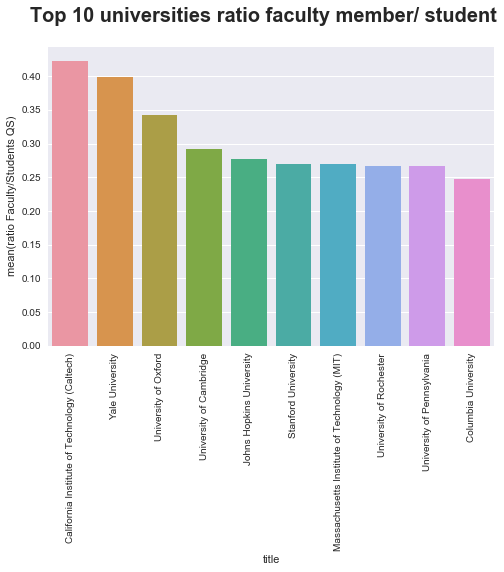

In [452]:
ax = plt.figure()
g = sns.barplot(x = 'title', y = "ratio Faculty/Students QS", data = df_sorted_a[['title','ratio Faculty/Students QS']][0:10])
g.set_xticklabels(labels = df_sorted_a['title'], rotation=90)
ax.suptitle("Top 10 universities ratio faculty member/ student", fontsize=20, fontweight="bold")
plt.show()

Sort dataframe by ratio InterStudents/Students descending values

In [453]:
df_sorted_b = df.sort_values(['ratio Inter Students/Students QS'],ascending=0)
df_sorted_b.head()

,country,rank_display,region,title,Nb Faculty QS,Nb Faculty inter QS,Nb Students QS,Nb Students Inter QS,ratio Faculty/Students QS,ratio Inter Students/Students QS
34,United Kingdom,35,Europe,London School of Economics and Political Scien...,1088.0,687.0,9760.0,6748.0,0.111475,0.691393
11,Switzerland,12,Europe,Ecole Polytechnique Fédérale de Lausanne (EPFL),1695.0,1300.0,10343.0,5896.0,0.163879,0.570047
7,United Kingdom,8,Europe,Imperial College London,3930.0,2071.0,16090.0,8746.0,0.244251,0.543567
198,Netherlands,200,Europe,Maastricht University,1277.0,502.0,16385.0,8234.0,0.077937,0.502533
47,United States,=47,North America,Carnegie Mellon University,1342.0,425.0,13356.0,6385.0,0.100479,0.478062


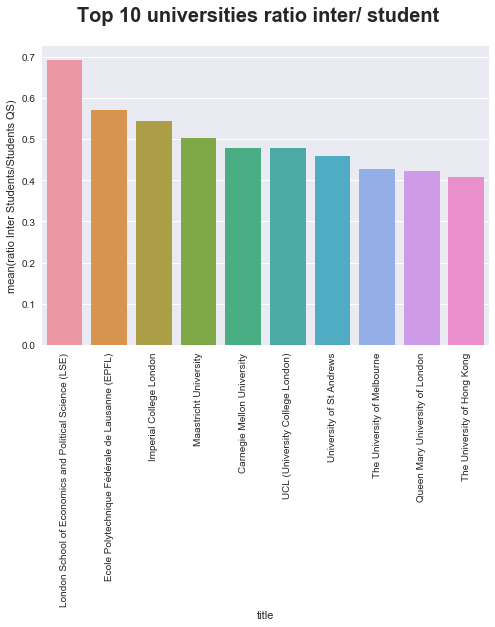

In [454]:
ax = plt.figure()
g = sns.barplot(x = 'title', y = "ratio Inter Students/Students QS", data = df_sorted_b[['title','ratio Inter Students/Students QS']][0:10])
g.set_xticklabels(labels = df_sorted_b['title'], rotation=90)
ax.suptitle("Top 10 universities ratio inter/ student", fontsize=20, fontweight="bold")
plt.show()

The best university in terms of ratio Faculty/Student is California Institute of Technology (Caltech), with a ratio of 0.42. London School of Economics and Political Sciences presents the highest ratio of international students, which is 0.69, followed by **EPFL** with 0.57. 

## Answer the previous question aggregating the data by country ... 


We want now to group by Country:

In [455]:
univ_by_country = df_original.groupby(['country'])

Compute ratio Faculty/Students wrt. countries

In [456]:
ratio_faculty_students_c = univ_by_country['Nb Faculty QS'].sum()/univ_by_country['Nb Students QS'].sum()

In [457]:
ratio_faculty_students_c

country
Argentina         0.134267
Australia         0.072962
Austria           0.064890
Belgium           0.069924
Brazil            0.081814
Canada            0.104140
Chile             0.068579
China             0.115389
Denmark           0.177261
Finland           0.112885
France            0.113836
Germany           0.097594
Hong Kong         0.128948
India             0.084248
Ireland           0.081997
Israel            0.136047
Italy             0.046487
Japan             0.152479
Malaysia          0.153893
Mexico            0.108779
Netherlands       0.102651
New Zealand       0.068773
Norway            0.114996
Russia            0.221910
Saudi Arabia      0.175828
Singapore         0.161530
South Africa      0.088450
South Korea       0.141721
Spain             0.084096
Sweden            0.099939
Switzerland       0.140434
Taiwan            0.083042
United Kingdom    0.136962
United States     0.120811
dtype: float64

Sort ratio Faculty/Students Series by descending values

In [458]:
ratio_faculty_students_c=ratio_faculty_students_c.sort_values(ascending=False)

Plot Faculty/Students ratio in function of countries

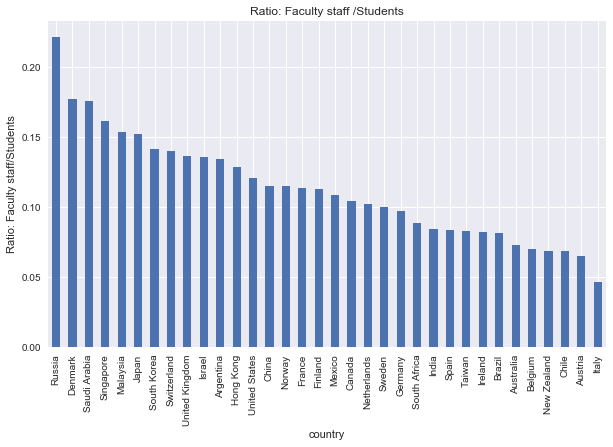

In [459]:
ax1 = ratio_faculty_students_c.plot(kind='bar', grid=True, figsize=(10, 6), title='Ratio: Faculty staff /Students')
ax1.set_ylabel("Ratio: Faculty staff/Students")
plt.show()

Result is suprising, Russia's first !

Compute ratio InterStudents/Students wrt. countries

In [460]:
ratio_studentsInter_students_c = univ_by_country['Nb Students Inter QS'].sum()/univ_by_country['Nb Students QS'].sum()

Sort ratio InterStudents/Students Series by descending values

In [461]:
ratio_studentsInter_students_c=ratio_studentsInter_students_c.sort_values(ascending=False)

In [462]:
ratio_studentsInter_students_c

country
Australia         0.352189
United Kingdom    0.341705
Hong Kong         0.310751
Austria           0.309980
Switzerland       0.302396
Singapore         0.276537
Canada            0.260161
New Zealand       0.258215
Ireland           0.235299
Netherlands       0.232980
Argentina         0.221658
France            0.194806
Malaysia          0.194168
United States     0.173047
Sweden            0.170716
South Africa      0.169703
Russia            0.168624
Germany           0.164833
Saudi Arabia      0.163742
Belgium           0.147853
Denmark           0.141960
Norway            0.126776
Spain             0.124001
South Korea       0.116177
China             0.113748
Italy             0.098726
Taiwan            0.094152
Finland           0.088671
Japan             0.087363
Israel            0.062549
Chile             0.047456
Brazil            0.033072
Mexico            0.023082
India             0.010501
dtype: float64

Plot InterStudents/Students ratio in function of countries

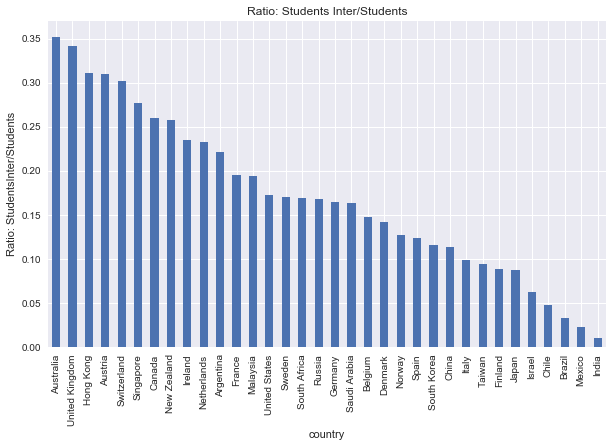

In [463]:
ax2 = ratio_studentsInter_students_c.plot(kind='bar', grid=True, figsize=(10, 6), title='Ratio: Students Inter/Students')
ax2.set_ylabel("Ratio: StudentsInter/Students")
plt.show()

Australia is the country with the higher international student ratio. One may have UK and Australia inverted with the use of "mean".

## Answer the previous question aggregating the data by Region ... 


Group original dataframe by region

In [464]:
univ_by_region = df_original.groupby(['region'])

Compute Faculty/Students ratio wrt. regions

In [465]:
ratio_faculty_students_r = univ_by_region['Nb Faculty QS'].sum()/univ_by_region['Nb Students QS'].sum()

Sort ratio Faculty/Students Series by descending values

In [466]:
ratio_faculty_students_r=ratio_faculty_students_r.sort_values(ascending=False)

Plot ratio wrt. regions

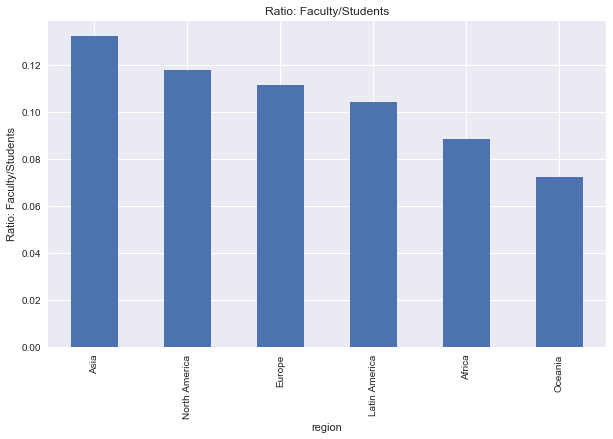

In [467]:
ax3 = ratio_faculty_students_r.plot(kind='bar', grid=True, figsize=(10, 6), title='Ratio: Faculty/Students')
ax3.set_ylabel("Ratio: Faculty/Students")
plt.show()

Compute InterStudents/Students ration wrt. regions

In [468]:
ratio_studentsInter_students_r = univ_by_region['Nb Students Inter QS'].sum()/univ_by_region['Nb Students QS'].sum()

Sort ratio Series by descending values

In [469]:
ratio_studentsInter_students_r=ratio_studentsInter_students_r.sort_values(ascending=False)

Plot ratio wrt. regions

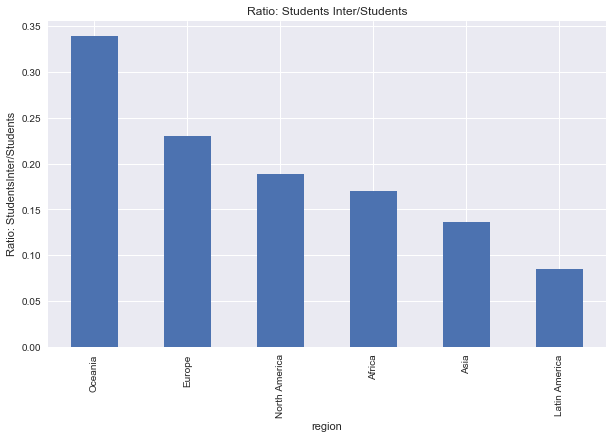

In [470]:
ax4 = ratio_studentsInter_students_r.plot(kind='bar', grid=True, figsize=(10, 6), title='Ratio: Students Inter/Students')
ax4.set_ylabel("Ratio: StudentsInter/Students")
plt.show()

So through this 4 histograms we notice that:

- Individual US and UK universities are mainly represented among both ratios.
- But regarding the whole country, they do not top the chart of facultaf staff/student ratio.
- We can deduce than in UK and US, levels of unversities meaning their reputation and attractivness are very disparate.
- Oceania leads for international students but is last in faculty staff. Europe is average in both !
- Suprisingly, Russia holds the title of country with the better faculty/student ratio.
- Europe scores are pulled by UK and Switzerland. This result is coherent since UK and Switzerland universities are in top of europe rankings

## 2. Obtain the 200 top-ranking universities in www.timeshighereducation.com (ranking 2018). Repeat the analysis of the previous point and discuss briefly what you observed.

Now we focus on a new ranking set by the Times.

In [471]:
url_THE=URL_times = "https://www.timeshighereducation.com"

By the same process as before, we get the direct link of the JSON

In [472]:
newURL='https://www.timeshighereducation.com/sites/default/files/the_data_rankings/world_university_rankings_2018_limit0_369a9045a203e176392b9fb8f8c1cb2a.json'

Get the JSON:

In [473]:
s = requests.get(newURL)
newdata= s.json()

Get JSON data content:

In [474]:
newdf = newdata.get('data')

JSON from the beggining is back to match Region with countrys from time rankins

In [475]:
data2=data.get('data')

We clean and arrange the data to support our analysis:

In [476]:
univ_list = []
for univ in newdf[0:200]:
    univ_crt = pd.DataFrame([]); 
    
    # Get simple information from in the main list
    name = univ['name'] 
    rank = univ['rank']
    country = univ['location']
    if country=='Russian Federation':
        country='Russia'
    
    num_student = int(univ['stats_number_students'].strip().replace(',',''))
    perc_int_student = float(univ['stats_pc_intl_students'].strip().replace('%',''))
    num_int_student = int(num_student * perc_int_student / 100) 
    
    ratio_stud_falc = float(univ['stats_student_staff_ratio'])
    num_faculty = int( (1 / ratio_stud_falc) *  num_student)
    
    # Get informations from details pages
#     details_r = requests.get( URL_times + univ['url'] )
#     page_body = details_r.text
#     soup = BeautifulSoup(page_body, 'html.parser')
       
    for univ2 in data2:
        if country==univ2['country']:
            region=univ2['region']
    
    univ_crt = {'Name': name, 
                'Rank times': rank,
                'Country': country,
                'Num students times': num_student,
                'Num intl students times': num_int_student,
                'Num faculty times': num_faculty,
                'Region':region
                } 
    
    univ_list.append(univ_crt)  

df_times_original = pd.DataFrame.from_dict(univ_list)
df_times= df_times_original.copy()
df_times_original.head()

,Country,Name,Num faculty times,Num intl students times,Num students times,Rank times,Region
0,United Kingdom,University of Oxford,1822,7755,20409,1,Europe
1,United Kingdom,University of Cambridge,1687,6436,18389,2,Europe
2,United States,California Institute of Technology,339,596,2209,=3,North America
3,United States,Stanford University,2112,3485,15845,=3,North America
4,United States,Massachusetts Institute of Technology,1284,3800,11177,5,North America


Now let's compute gain all the data that matter in our analysis by keeping only the relevant columns

In [477]:
df_times['stud intl/tot times'] = df_times['Num intl students times']/df_times['Num students times']

In [478]:
df_times['fac/tot times'] = df_times['Num faculty times']/df_times['Num students times']

In [479]:
df_times.head()

,Country,Name,Num faculty times,Num intl students times,Num students times,Rank times,Region,stud intl/tot times,fac/tot times
0,United Kingdom,University of Oxford,1822,7755,20409,1,Europe,0.379979,0.089274
1,United Kingdom,University of Cambridge,1687,6436,18389,2,Europe,0.349992,0.091740
2,United States,California Institute of Technology,339,596,2209,=3,North America,0.269805,0.153463
3,United States,Stanford University,2112,3485,15845,=3,North America,0.219943,0.133291
4,United States,Massachusetts Institute of Technology,1284,3800,11177,5,North America,0.339984,0.114879


We notice that staff calculation is different from a classement to another. Nevertheless, international student should be pretty much the same between the two rankings.

In [480]:
df_sorted_the_inter=df_times.sort_values(['stud intl/tot times'], ascending = 0, axis = 0)

In [481]:
df_sorted_the_inter

,Country,Name,Num faculty times,Num intl students times,Num students times,Rank times,Region,stud intl/tot times,fac/tot times
24,United Kingdom,London School of Economics and Political Science,825,7146,10065,=25,Europe,0.709985,0.081967
178,Luxembourg,University of Luxembourg,340,2832,4969,=179,Asia,0.569934,0.068424
7,United Kingdom,Imperial College London,1390,8721,15857,8,Europe,0.549978,0.087658
37,Switzerland,École Polytechnique Fédérale de Lausanne,886,5460,9928,=38,Europe,0.549960,0.089243
102,Netherlands,Maastricht University,929,8363,16727,103,Europe,0.499970,0.055539
15,United Kingdom,University College London,2886,14848,30304,16,Europe,0.489968,0.095235
143,United Kingdom,University of St Andrews,692,4322,9005,=143,Europe,0.479956,0.076846
23,United States,Carnegie Mellon University,938,5704,12676,24,North America,0.449984,0.073998
120,United Kingdom,Queen Mary University of London,1158,6932,15405,121,Europe,0.449984,0.075170
39,Hong Kong,University of Hong Kong,1020,7712,18364,40,Asia,0.419952,0.055543


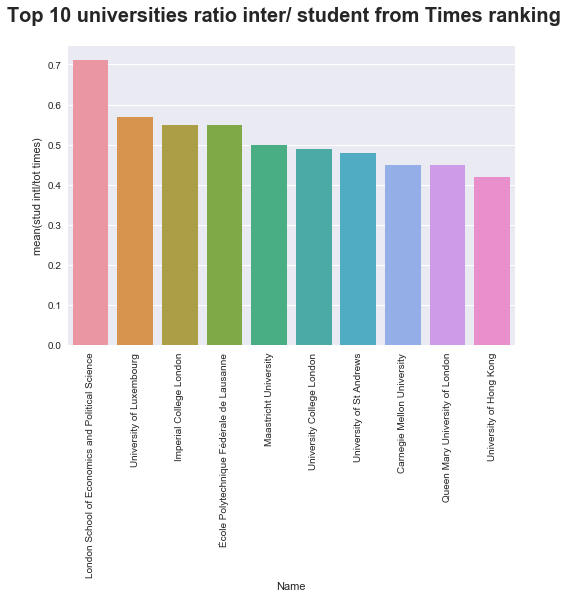

In [482]:
ax = plt.figure()
g = sns.barplot(x = 'Name', y = "stud intl/tot times", data = df_sorted_the_inter[['Name','stud intl/tot times']][0:10])
g.set_xticklabels(labels = df_sorted_the_inter['Name'], rotation=90)
ax.suptitle("Top 10 universities ratio inter/ student from Times ranking", fontsize=20, fontweight="bold")
plt.show()

Common univ between the two charts are in the same order and with closely the same score. Universities present in only one of the two charts are universities not present in the top 200 of the other ranking. Example: University of Luxembourg.

Ok now we know that top 200 univ are not the same in the two rankings. Let's see if country and region trends are the same.

In [483]:
df_sorted_the_inter_c=df_times.groupby(['Country'])
df_sorted_the_inter_r=df_times.groupby(['Region'])
#df_sorted_the_inter_c=df_sorted_the_inter_c.sort_values(ascending=False)

TO BE DONE : BAR CHARTS FOR INTERNATIONAL STUDENTS RATIO by Country and Region

TO BE DONE : ANALYSIS OF DIFFERENCES

 
## 3. Merge the two DataFrames created in questions 1 and 2 using university names. Match universities' names as well as you can, and explain your strategy. Keep track of the original position in both rankings.



##### Challenge
The university name can differ between the 2 rankings. For example, in the Times ranking, we have "École Polytechnique Fédérale de Lausanne", which is named "Ecole Polytechnique Fédérale de Lausanne (EPFL)" in the topuniversity ranking. 


Moreover, a university can be ranked in the top 200 in one ranking and can also be over rank 200 in the other one. 


##### Our idea


To find match between the names of the universities, we will use `difflib`, a python module that provides functions for comparing sequences. The one we are interested in is **`SequenceMatcher`**. 
This allows to compute a matching score between two strings.

In [484]:
from difflib import SequenceMatcher
def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

In [485]:
# To start over with original dataframes
df_topu = df_original.copy()
df_times = df_times.copy()

##### Our implementation


For each university of the first dataframe, we check if its name matches with one in the other dataframe. We get only match with a matching score over a certain threshold score we define later. 
If a university matches several ones in the other dataframe, we choose the one with the highest score, and update its name,to have exactly the same in both dataframe. 
If a university doesn't match any in the other dataframe, we don't change anything.

Finally we can merge on the university names.

In [486]:
threshold_score = 0.87

nb_match = 0
for index_topu, univ_topu in df_topu.iterrows():
    match = []
    
    for index_times, univ_times in df_times.iterrows():
        match_score = similar(univ_topu.title, univ_times.Name)
        if match_score > threshold_score:
            match.append({'match_name': univ_times.Name, 'score': match_score})
            
    if match:  # Check if the list is empty (in case there is no match)
        df_match = pd.DataFrame.from_dict(match)
        
#         if len(match) > 1:
#             print("\n :::: {}".format(univ_topu.Name))
#             print(df_match)
        
        highest_match = df_match.loc[df_match['score'].idxmax()]
        if highest_match['score'] < 0.92:
            print("{}: {} --- {}".format(highest_match['score'], df_topu.loc[index_topu,'title'], highest_match['match_name']))
        df_topu.loc[index_topu,'Name'] = highest_match['match_name']
        nb_match += 1
        

0.8717948717948718: California Institute of Technology (Caltech) --- California Institute of Technology
0.8928571428571429: UCL (University College London) --- University College London
0.9158878504672897: ETH Zurich - Swiss Federal Institute of Technology --- ETH Zurich – Swiss Federal Institute of Technology Zurich
0.896551724137931: Ecole Polytechnique Fédérale de Lausanne (EPFL) --- École Polytechnique Fédérale de Lausanne
0.9142857142857143: National University of Singapore (NUS) --- National University of Singapore
0.918918918918919: University of California, Berkeley (UCB) --- University of California, Berkeley
0.9047619047619048: The University of Tokyo --- University of Tokyo
0.9135802469135802: University of California, Los Angeles (UCLA) --- University of California, Los Angeles
0.9090909090909091: University of California, San Diego (UCSD) --- University of California, San Diego
0.9090909090909091: The University of Sydney --- University of Sydney
0.8709677419354839: Tokyo 

##### Choice of the threshold score

We tested different threshold matching score and tried to affine it.

At first, 0.85 looked good, but we found inconsistencies in our results. We check at matching universities for those with more than one match. We found the **Vienna University of Technology**, which is in the 200 top ranking universities only in topuniversities ranking and that is over the 300rank in the Times one. It had a the following  matching score :

                            match_name     score
        Delft University of Technology  0.852459
    Eindhoven University of Technology  0.861538


Obviously, none of the those two universities were the good one. Thus, we had to update our threshold score by increasing it to affine this kind of wrong match. 


We didn't increase it too much so that all the universities with a match can find it. For example it is sure that "The University of Hong Kong" should match with "University of Hong Kong". Their matching score is "only" 0.92 (see table below),so for cases like this, we can't put a threshold score too high.

                            match_name     score
    0          University of Hong Kong  0.920000
    1  Chinese University of Hong Kong  0.896552
    2     City University of Hong Kong  0.872727
    

In [487]:
print("-> {} match between university names were found in the two rankings".format(nb_match))

-> 145 match between university names were found in the two rankings


Now, let's merge our two dataframes

In [488]:
df_topu['rank_display']=df_topu.index.values+1
df_times['Rank times']=df_times.index.values+1

In [489]:
df_times

,Country,Name,Num faculty times,Num intl students times,Num students times,Rank times,Region,stud intl/tot times,fac/tot times
0,United Kingdom,University of Oxford,1822,7755,20409,1,Europe,0.379979,0.089274
1,United Kingdom,University of Cambridge,1687,6436,18389,2,Europe,0.349992,0.091740
2,United States,California Institute of Technology,339,596,2209,3,North America,0.269805,0.153463
3,United States,Stanford University,2112,3485,15845,4,North America,0.219943,0.133291
4,United States,Massachusetts Institute of Technology,1284,3800,11177,5,North America,0.339984,0.114879
5,United States,Harvard University,2283,5284,20326,6,North America,0.259963,0.112319
6,United States,Princeton University,958,1909,7955,7,North America,0.239975,0.120427
7,United Kingdom,Imperial College London,1390,8721,15857,8,Europe,0.549978,0.087658
8,United States,University of Chicago,2181,3381,13525,9,North America,0.249982,0.161257
9,Switzerland,ETH Zurich – Swiss Federal Institute of Techno...,1317,7308,19233,10,Europe,0.379972,0.068476


In [490]:
# Merge the 2 dataframe on university names
df_merged = pd.merge(df_topu, df_times, how='outer', right_on='Name', left_on='Name')
df_merged

,country,rank_display,region,title,Nb Faculty QS,Nb Faculty inter QS,Nb Students QS,Nb Students Inter QS,ratio Faculty/Students QS,ratio Inter Students/Students QS,Name,Country,Num faculty times,Num intl students times,Num students times,Rank times,Region,stud intl/tot times,fac/tot times
0,United States,1.0,North America,Massachusetts Institute of Technology (MIT),2982.0,1679.0,11067.0,3717.0,0.269450,0.335863,Massachusetts Institute of Technology,United States,1284.0,3800.0,11177.0,5.0,North America,0.339984,0.114879
1,United States,2.0,North America,Stanford University,4285.0,2042.0,15878.0,3611.0,0.269870,0.227422,Stanford University,United States,2112.0,3485.0,15845.0,4.0,North America,0.219943,0.133291
2,United States,3.0,North America,Harvard University,4350.0,1311.0,22429.0,5266.0,0.193945,0.234785,Harvard University,United States,2283.0,5284.0,20326.0,6.0,North America,0.259963,0.112319
3,United States,4.0,North America,California Institute of Technology (Caltech),953.0,350.0,2255.0,647.0,0.422616,0.286918,California Institute of Technology,United States,339.0,596.0,2209.0,3.0,North America,0.269805,0.153463
4,United Kingdom,5.0,Europe,University of Cambridge,5490.0,2278.0,18770.0,6699.0,0.292488,0.356899,University of Cambridge,United Kingdom,1687.0,6436.0,18389.0,2.0,Europe,0.349992,0.091740
5,United Kingdom,6.0,Europe,University of Oxford,6750.0,2964.0,19720.0,7353.0,0.342292,0.372870,University of Oxford,United Kingdom,1822.0,7755.0,20409.0,1.0,Europe,0.379979,0.089274
6,United Kingdom,7.0,Europe,UCL (University College London),6345.0,2554.0,31080.0,14854.0,0.204151,0.477928,University College London,United Kingdom,2886.0,14848.0,30304.0,16.0,Europe,0.489968,0.095235
7,United Kingdom,8.0,Europe,Imperial College London,3930.0,2071.0,16090.0,8746.0,0.244251,0.543567,Imperial College London,United Kingdom,1390.0,8721.0,15857.0,8.0,Europe,0.549978,0.087658
8,United States,9.0,North America,University of Chicago,2449.0,635.0,13557.0,3379.0,0.180645,0.249244,University of Chicago,United States,2181.0,3381.0,13525.0,9.0,North America,0.249982,0.161257
9,Switzerland,10.0,Europe,ETH Zurich - Swiss Federal Institute of Techno...,2477.0,1886.0,19815.0,7563.0,0.125006,0.381681,ETH Zurich – Swiss Federal Institute of Techno...,Switzerland,1317.0,7308.0,19233.0,10.0,Europe,0.379972,0.068476


##### Can you find the best university taking in consideration both rankings? Explain your approach.

We can find the best university by meaning the rankings

In [ ]:
df_merged['mean_rank']=(df_merged['rank_display'] + df_merged['Rank times'])/2
final_ranking=df_merged.sort_values('mean_rank',ascending=True)

In [516]:
final_ranking.reset_index().head()

,index,country,rank_display,region,title,Nb Faculty QS,Nb Faculty inter QS,Nb Students QS,Nb Students Inter QS,ratio Faculty/Students QS,...,Name,Country,Num faculty times,Num intl students times,Num students times,Rank times,Region,stud intl/tot times,fac/tot times,mean_rank
0,0,United States,1.0,North America,Massachusetts Institute of Technology (MIT),2982.0,1679.0,11067.0,3717.0,0.269450,...,Massachusetts Institute of Technology,United States,1284.0,3800.0,11177.0,5.0,North America,0.339984,0.114879,3.0
1,1,United States,2.0,North America,Stanford University,4285.0,2042.0,15878.0,3611.0,0.269870,...,Stanford University,United States,2112.0,3485.0,15845.0,4.0,North America,0.219943,0.133291,3.0
2,3,United States,4.0,North America,California Institute of Technology (Caltech),953.0,350.0,2255.0,647.0,0.422616,...,California Institute of Technology,United States,339.0,596.0,2209.0,3.0,North America,0.269805,0.153463,3.5
3,4,United Kingdom,5.0,Europe,University of Cambridge,5490.0,2278.0,18770.0,6699.0,0.292488,...,University of Cambridge,United Kingdom,1687.0,6436.0,18389.0,2.0,Europe,0.349992,0.091740,3.5
4,5,United Kingdom,6.0,Europe,University of Oxford,6750.0,2964.0,19720.0,7353.0,0.342292,...,University of Oxford,United Kingdom,1822.0,7755.0,20409.0,1.0,Europe,0.379979,0.089274,3.5


##### Find useful insights in the data by performing an exploratory analysis. Can you find a strong correlation between any pair of variables in the dataset you just created? Example: when a university is strong in its international dimension, can you observe a consistency both for students and faculty members?

In [493]:
df_merged.corr()

,rank_display,Nb Faculty QS,Nb Faculty inter QS,Nb Students QS,Nb Students Inter QS,ratio Faculty/Students QS,ratio Inter Students/Students QS,Num faculty times,Num intl students times,Num students times,Rank times,stud intl/tot times,fac/tot times,mean_rank
rank_display,1.000000,-0.316595,-0.534798,-0.039750,-0.309659,-0.421397,-0.369427,-0.238275,-0.279210,-0.017180,0.690486,-0.301245,-0.196747,0.918806
Nb Faculty QS,-0.316595,1.000000,0.590219,0.764622,0.471808,0.260203,-0.069686,0.748151,0.403341,0.614958,-0.364096,-0.139424,0.163184,-0.396960
Nb Faculty inter QS,-0.534798,0.590219,1.000000,0.307161,0.641201,0.325857,0.424591,0.290239,0.543925,0.277760,-0.368833,0.315482,-0.001040,-0.473502
Nb Students QS,-0.039750,0.764622,0.307161,1.000000,0.558612,-0.315515,-0.171006,0.535331,0.567602,0.982020,-0.150632,-0.289385,-0.368170,-0.091619
Nb Students Inter QS,-0.309659,0.471808,0.641201,0.558612,1.000000,-0.177791,0.539897,0.185389,0.924193,0.571021,-0.265416,0.410964,-0.341913,-0.280721
ratio Faculty/Students QS,-0.421397,0.260203,0.325857,-0.315515,-0.177791,1.000000,0.128050,0.165026,-0.222950,-0.410265,-0.304103,0.130198,0.697592,-0.388533
ratio Inter Students/Students QS,-0.369427,-0.069686,0.424591,-0.171006,0.539897,0.128050,1.000000,-0.263804,0.541446,-0.240334,-0.234059,0.953067,-0.077517,-0.298169
Num faculty times,-0.238275,0.748151,0.290239,0.535331,0.185389,0.165026,-0.263804,1.000000,0.281749,0.571944,-0.250579,-0.210950,0.486883,-0.254367
Num intl students times,-0.279210,0.403341,0.543925,0.567602,0.924193,-0.222950,0.541446,0.281749,1.000000,0.582425,-0.331657,0.500661,-0.256525,-0.307781
Num students times,-0.017180,0.614958,0.277760,0.982020,0.571021,-0.410265,-0.240334,0.571944,0.582425,1.000000,-0.155697,-0.283000,-0.313882,-0.087996


##### Let's explore another idea : BONUS

We use least squares regression on both datasets and get estimates for each regressor. Since we have 200 rows in each, we will assume that we can average each regressor and form a new model to apply on the merged dataframe.

In [494]:
import statsmodels.formula.api  as lm

Prepare data for QS ranking (Regressors name to be in one string)

In [515]:
df_topu.head()

,country,rank,region,title,Nb_Faculty_QS,Nb_Faculty_inter_QS,Nb_Students_QS,Nb_Students_Inter_QS,ratio_Faculty_Students_QS,ratio_Inter_Students_Students_QS,name
0,United States,1,North America,Massachusetts Institute of Technology (MIT),2982.0,1679.0,11067.0,3717.0,0.269450,0.335863,Massachusetts Institute of Technology
1,United States,2,North America,Stanford University,4285.0,2042.0,15878.0,3611.0,0.269870,0.227422,Stanford University
2,United States,3,North America,Harvard University,4350.0,1311.0,22429.0,5266.0,0.193945,0.234785,Harvard University
3,United States,4,North America,California Institute of Technology (Caltech),953.0,350.0,2255.0,647.0,0.422616,0.286918,California Institute of Technology
4,United Kingdom,5,Europe,University of Cambridge,5490.0,2278.0,18770.0,6699.0,0.292488,0.356899,University of Cambridge


In [496]:
df2=df_topu
df2.columns=['country','rank','region','title','Nb_Faculty_QS','Nb_Faculty_inter_QS','Nb_Students_QS','Nb_Students_Inter_QS','ratio_Faculty_Students_QS','ratio_Inter_Students_Students_QS','name']
df2['rank']=df2.index.values+1###We assign the index of the df to ranks to avoid ex-aeqo ranking (ex : =23). So ranks will be assigned as orderer in the Df

In [497]:
df2.head()

,country,rank,region,title,Nb_Faculty_QS,Nb_Faculty_inter_QS,Nb_Students_QS,Nb_Students_Inter_QS,ratio_Faculty_Students_QS,ratio_Inter_Students_Students_QS,name
0,United States,1,North America,Massachusetts Institute of Technology (MIT),2982.0,1679.0,11067.0,3717.0,0.269450,0.335863,Massachusetts Institute of Technology
1,United States,2,North America,Stanford University,4285.0,2042.0,15878.0,3611.0,0.269870,0.227422,Stanford University
2,United States,3,North America,Harvard University,4350.0,1311.0,22429.0,5266.0,0.193945,0.234785,Harvard University
3,United States,4,North America,California Institute of Technology (Caltech),953.0,350.0,2255.0,647.0,0.422616,0.286918,California Institute of Technology
4,United Kingdom,5,Europe,University of Cambridge,5490.0,2278.0,18770.0,6699.0,0.292488,0.356899,University of Cambridge


Prepare data for times ranking

In [500]:
df_times2=df_times
df_times2.columns=['country','Name','Nb_Faculty_times','Nb_Students_Inter_times','Nb_Students_times','rank','region','ratio_Inter_Students_Students_times','ratio_Faculty_Students_times']
df_times2['rank']=df_times2.index.values+1


In [501]:
df_times2.head()

,country,Name,Nb_Faculty_times,Nb_Students_Inter_times,Nb_Students_times,rank,region,ratio_Inter_Students_Students_times,ratio_Faculty_Students_times
0,United Kingdom,University of Oxford,1822,7755,20409,1,Europe,0.379979,0.089274
1,United Kingdom,University of Cambridge,1687,6436,18389,2,Europe,0.349992,0.091740
2,United States,California Institute of Technology,339,596,2209,3,North America,0.269805,0.153463
3,United States,Stanford University,2112,3485,15845,4,North America,0.219943,0.133291
4,United States,Massachusetts Institute of Technology,1284,3800,11177,5,North America,0.339984,0.114879


Now we have the two datasets ready. To perform a regression, we need to identify which parameters may be relevant to rank calculation. Indeed, data such region or country are not relevant. 
We will perform regression on the following parameters:
    - Ratio of international students
    - Ratio of staff/student
This is a very simple model. Data such as number of students, staff are not relevant since correlated with ratios (PCA dimension reduction). We keep the intercept, we consider that it may compensated lack of predictors.

First for QS

In [502]:
# Fit regression model 
In [5]: resultsQS = lm.ols('rank ~ ratio_Inter_Students_Students_QS + ratio_Faculty_Students_QS ', data=df2).fit()

# Inspect the results
In [6]: print(resultsQS.summary())

                            OLS Regression Results                            
Dep. Variable:                   rank   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     37.88
Date:                Tue, 24 Oct 2017   Prob (F-statistic):           1.24e-14
Time:                        18:16:31   Log-Likelihood:                -1057.1
No. Observations:                 199   AIC:                             2120.
Df Residuals:                     196   BIC:                             2130.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [503]:
In [5]: results_times = lm.ols('rank ~ ratio_Inter_Students_Students_times + ratio_Faculty_Students_times ', data=df_times2).fit()

# Inspect the results
In [6]: print(results_times.summary())


                            OLS Regression Results                            
Dep. Variable:                   rank   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     7.339
Date:                Tue, 24 Oct 2017   Prob (F-statistic):           0.000843
Time:                        18:16:35   Log-Likelihood:                -1087.8
No. Observations:                 200   AIC:                             2182.
Df Residuals:                     197   BIC:                             2191.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

Coefficient obtained are the following:

In [504]:
resultsQS.params#QS ranking

Intercept                           180.211018
ratio_Inter_Students_Students_QS   -159.292675
ratio_Faculty_Students_QS          -364.386070
dtype: float64

In [505]:
results_times.params#Times ranking

Intercept                              138.554582
ratio_Inter_Students_Students_times   -107.582583
ratio_Faculty_Students_times          -185.184931
dtype: float64

Let's compute mean coeff

In [506]:
intercept=(resultsQS.params[0]+results_times.params[0])/2
BetaInter=(resultsQS.params[1]+results_times.params[1])/2
BetaFac=(resultsQS.params[2]+results_times.params[2])/2

##### We see that for the two rankings coefficient are almost proportionnal. We see also through R¨2 that half of the variation of the outputs (rank) are explained through the two variables. So even if our model is really simple we almost explain half of the output.

In [510]:
mergealors= pd.merge(df_times2, df2, how='outer', right_on='name',left_on='Name')

In [511]:
mergealors['mean_fac_stud']=(mergealors['ratio_Faculty_Students_QS'] +mergealors['ratio_Faculty_Students_times'])/2
mergealors['mean_ratio_inter_stud']=(mergealors['ratio_Inter_Students_Students_times'] +mergealors['ratio_Inter_Students_Students_QS'])/2

In [512]:
mergealors

,country_x,Name,Nb_Faculty_times,Nb_Students_Inter_times,Nb_Students_times,rank_x,region_x,ratio_Inter_Students_Students_times,ratio_Faculty_Students_times,country_y,...,title,Nb_Faculty_QS,Nb_Faculty_inter_QS,Nb_Students_QS,Nb_Students_Inter_QS,ratio_Faculty_Students_QS,ratio_Inter_Students_Students_QS,name,mean_fac_stud,mean_ratio_inter_stud
0,United Kingdom,University of Oxford,1822.0,7755.0,20409.0,1.0,Europe,0.379979,0.089274,United Kingdom,...,University of Oxford,6750.0,2964.0,19720.0,7353.0,0.342292,0.372870,University of Oxford,0.215783,0.376425
1,United Kingdom,University of Cambridge,1687.0,6436.0,18389.0,2.0,Europe,0.349992,0.091740,United Kingdom,...,University of Cambridge,5490.0,2278.0,18770.0,6699.0,0.292488,0.356899,University of Cambridge,0.192114,0.353446
2,United States,California Institute of Technology,339.0,596.0,2209.0,3.0,North America,0.269805,0.153463,United States,...,California Institute of Technology (Caltech),953.0,350.0,2255.0,647.0,0.422616,0.286918,California Institute of Technology,0.288040,0.278362
3,United States,Stanford University,2112.0,3485.0,15845.0,4.0,North America,0.219943,0.133291,United States,...,Stanford University,4285.0,2042.0,15878.0,3611.0,0.269870,0.227422,Stanford University,0.201581,0.223682
4,United States,Massachusetts Institute of Technology,1284.0,3800.0,11177.0,5.0,North America,0.339984,0.114879,United States,...,Massachusetts Institute of Technology (MIT),2982.0,1679.0,11067.0,3717.0,0.269450,0.335863,Massachusetts Institute of Technology,0.192164,0.337924
5,United States,Harvard University,2283.0,5284.0,20326.0,6.0,North America,0.259963,0.112319,United States,...,Harvard University,4350.0,1311.0,22429.0,5266.0,0.193945,0.234785,Harvard University,0.153132,0.247374
6,United States,Princeton University,958.0,1909.0,7955.0,7.0,North America,0.239975,0.120427,United States,...,Princeton University,1007.0,246.0,8069.0,1793.0,0.124799,0.222208,Princeton University,0.122613,0.231092
7,United Kingdom,Imperial College London,1390.0,8721.0,15857.0,8.0,Europe,0.549978,0.087658,United Kingdom,...,Imperial College London,3930.0,2071.0,16090.0,8746.0,0.244251,0.543567,Imperial College London,0.165955,0.546773
8,United States,University of Chicago,2181.0,3381.0,13525.0,9.0,North America,0.249982,0.161257,United States,...,University of Chicago,2449.0,635.0,13557.0,3379.0,0.180645,0.249244,University of Chicago,0.170951,0.249613
9,Switzerland,ETH Zurich – Swiss Federal Institute of Techno...,1317.0,7308.0,19233.0,10.0,Europe,0.379972,0.068476,Switzerland,...,ETH Zurich - Swiss Federal Institute of Techno...,2477.0,1886.0,19815.0,7563.0,0.125006,0.381681,ETH Zurich – Swiss Federal Institute of Techno...,0.096741,0.380826


We will apply the "model" with coeff found above

In [513]:
mergealors['Final_Score']=intercept + BetaInter*mergealors['mean_ratio_inter_stud'] + BetaFac*mergealors['mean_fac_stud']

In [514]:
mergealors.sort_values('Final_Score',ascending=True)[0:10]

,country_x,Name,Nb_Faculty_times,Nb_Students_Inter_times,Nb_Students_times,rank_x,region_x,ratio_Inter_Students_Students_times,ratio_Faculty_Students_times,country_y,...,Nb_Faculty_QS,Nb_Faculty_inter_QS,Nb_Students_QS,Nb_Students_Inter_QS,ratio_Faculty_Students_QS,ratio_Inter_Students_Students_QS,name,mean_fac_stud,mean_ratio_inter_stud,Final_Score
24,United Kingdom,London School of Economics and Political Science,825.0,7146.0,10065.0,25.0,Europe,0.709985,0.081967,United Kingdom,...,1088.0,687.0,9760.0,6748.0,0.111475,0.691393,London School of Economics and Political Science,0.096721,0.700689,39.306871
7,United Kingdom,Imperial College London,1390.0,8721.0,15857.0,8.0,Europe,0.549978,0.087658,United Kingdom,...,3930.0,2071.0,16090.0,8746.0,0.244251,0.543567,Imperial College London,0.165955,0.546773,40.820786
2,United States,California Institute of Technology,339.0,596.0,2209.0,3.0,North America,0.269805,0.153463,United States,...,953.0,350.0,2255.0,647.0,0.422616,0.286918,California Institute of Technology,0.288040,0.278362,43.089732
11,United States,Yale University,2826.0,2552.0,12155.0,12.0,North America,0.209955,0.232497,United States,...,4940.0,1708.0,12402.0,2469.0,0.398323,0.199081,Yale University,0.315410,0.204518,45.422371
0,United Kingdom,University of Oxford,1822.0,7755.0,20409.0,1.0,Europe,0.379979,0.089274,United Kingdom,...,6750.0,2964.0,19720.0,7353.0,0.342292,0.372870,University of Oxford,0.215783,0.376425,49.859468
37,Switzerland,École Polytechnique Fédérale de Lausanne,886.0,5460.0,9928.0,38.0,Europe,0.549960,0.089243,Switzerland,...,1695.0,1300.0,10343.0,5896.0,0.163879,0.570047,École Polytechnique Fédérale de Lausanne,0.126561,0.560004,49.880196
154,United States,University of Rochester,2240.0,2794.0,9636.0,154.0,North America,0.289954,0.232462,United States,...,2569.0,488.0,9636.0,2805.0,0.266604,0.291096,University of Rochester,0.249533,0.290525,52.047767
15,United Kingdom,University College London,2886.0,14848.0,30304.0,16.0,Europe,0.489968,0.095235,United Kingdom,...,6345.0,2554.0,31080.0,14854.0,0.204151,0.477928,University College London,0.149693,0.483948,53.672508
12,United States,Johns Hopkins University,3604.0,3719.0,15498.0,13.0,North America,0.239966,0.232546,United States,...,4462.0,1061.0,16146.0,4105.0,0.276353,0.254243,Johns Hopkins University,0.254450,0.247104,56.490673
1,United Kingdom,University of Cambridge,1687.0,6436.0,18389.0,2.0,Europe,0.349992,0.091740,United Kingdom,...,5490.0,2278.0,18770.0,6699.0,0.292488,0.356899,University of Cambridge,0.192114,0.353446,59.429768


This model, although very simple and approximatively correct could be a good idea to compare each ranking meaning parameter  ponderation. Obvisouly the model need to get more prameters to be correct, such as number of papers published, employement rate after X months etc. Moreover we apply the model a dataset that has already seen once the data, which can cause bias.

 Bonus: (to be adapted with variables)

Let's confront the two rankings dataset on Oxford university

In [ ]:
newdf=newdf.set_index('aliases')

In [ ]:
newdf.loc['University of Oxford','stats_pc_intl_students']==df.set_index('title').loc['University of Oxford','ratio Inter Students/Students']

In [ ]:
newdf.loc['University of Oxford','stats_pc_intl_students']#times

In [ ]:
df.set_index('title').loc['University of Oxford','ratio Inter Students/Students']#QS

Data are close but not exactly the same. What a surprise, the times inflates score of an english university...Let's check with Cambrige university.

In [ ]:
newdf.loc['University of Cambridge','stats_pc_intl_students']==df.set_index('title').loc['University of Cambridge','ratio Inter Students/Students']

In [ ]:
newdf.loc['University of Cambridge','stats_pc_intl_students']#times

In [ ]:
df.set_index('title').loc['University of Cambridge','ratio Inter Students/Students']#QS

Ok my bad...Hmmm I want to be sure, I'll check on all england univ

In [ ]:
newdf.set_index('location').loc['United Kingdom',:]#times

In [ ]:
df.set_index('country').loc['United Kingdom',:]#QS

With a quick eye check, we notice that many THE data for international student ratios are inflated compared to QS. 